# Overview

In this Lab, we will cover

- Factors
- Lists and Dataframes
- Data loading from CSV
- Basic data inspection:
  - `head()`, `summary()`, `str()`, `class()`,
- Data visualization: Bar Plot, Histogram, Boxplot, Scatter Plot, etc.
- Data extraction
  - using index terms to extract a specific data column
  - building a new list from a data frame or table.

# Initial Setup

Upload the provided files to the Session Storage
  - `income.csv`

# Continuation R Introduction

## 1 Ordered and unordered factors

### 1.1 Factors

> A *factor* is a vector object used to specify a discrete classification (grouping) of the components of other vectors. R provides both *ordered* and *unordered* factors.

  > Levels: A factor has a set of levels, which are the unique values the factor can take. The order of the levels can be important, especially for ordered factors.

 > Ordered vs. Unordered Factors: While most factors simply represent categories, there are situations where the order matters. For instance, a factor representing the levels "low", "medium", and "high" would be an ordered factor.

  >Creation: You can convert a vector into a factor using the factor() function. If you want to create an ordered factor, you can use the ordered() function.



Below, we have a sequence, containing entries for the 8 states of Australia.
In total we have 30 entries, hence, the states repeat in this list.

In [82]:
# Note that there are eight states and territories in Australia, namely the
# Australian Capital Territory, New South Wales, the Northern Territory,
# Queensland, South Australia, Tasmania, Victoria and Western Australia.
state <- c("tas", "sa", "qld", "nsw", "nsw", "nt", "wa", "wa", "qld", "vic", "nsw", "vic", "qld", "qld", "sa", "tas", "sa", "nt", "wa", "vic", "qld", "nsw", "nsw", "wa", "sa", "act", "nsw", "vic", "vic", "act")

In [83]:
class(state); typeof(state)

[1] "character"

[1] "character"

In [84]:
statef <- factor(state)

In [85]:
class(statef); typeof(statef)

[1] "factor"

[1] "integer"

In [86]:
print(statef)

 [1] tas sa  qld nsw nsw nt  wa  wa  qld vic nsw vic qld qld sa  tas sa  nt  wa 
[20] vic qld nsw nsw wa  sa  act nsw vic vic act
Levels: act nsw nt qld sa tas vic wa


### 1.2 The `tapply()` function

> In R, the tapply() function applies a function to subsets of a vector, as defined by some factors. In other words, it is used to apply a specified function to each category/factor of a variable and obtain a result for each category.

> tapply() is especially useful for quick exploratory data analyses

Suppose, we have several entries of Tax income information for the states.

In [6]:
incomes <- c(60, 49, 40, 61, 64, 60, 59, 54, 62, 69, 70, 42, 56, 61, 61, 61, 58, 51, 48, 65, 49, 49, 41, 48, 52, 46,
                    59, 46, 58, 43)


Using the `unique` function. Displaying the unique values of `statef`

In [7]:
print(unique(statef))

[1] tas sa  qld nsw nt  wa  vic act
Levels: act nsw nt qld sa tas vic wa


Additionally, using the `levels` function to display the levels of a factor.

In [87]:
print(levels(statef))

[1] "act" "nsw" "nt"  "qld" "sa"  "tas" "vic" "wa" 


Now, let's use the `tapply` function to show the `mean` value for the `income` Tax inputes by state.

In [88]:
incmeans <- tapply(incomes, statef, mean)
print(incmeans)

     act      nsw       nt      qld       sa      tas      vic       wa 
44.50000 57.33333 55.50000 53.60000 55.00000 60.50000 56.00000 52.25000 


Using `tapply`, showing the minimum value of `income` of each state.

In [10]:
incmin <- tapply(incomes, statef, min)
print(incmin)

act nsw  nt qld  sa tas vic  wa 
 43  41  51  40  49  60  42  48 


Using `tapply`, showing the maximum value of `income` of each state.

In [11]:
incmax <- tapply(incomes, statef, max)
print(incmax)

act nsw  nt qld  sa tas vic  wa 
 46  70  60  62  61  61  69  59 


Using `tapply` to visualize the values of each group:

In [12]:
sortAndPrint <- tapply(incomes, statef, sort)
print(sortAndPrint)

$act
[1] 43 46

$nsw
[1] 41 49 59 61 64 70

$nt
[1] 51 60

$qld
[1] 40 49 56 61 62

$sa
[1] 49 52 58 61

$tas
[1] 60 61

$vic
[1] 42 46 58 65 69

$wa
[1] 48 48 54 59



In [13]:
levels(statef)

[1] "act" "nsw" "nt"  "qld" "sa"  "tas" "vic" "wa"

**Counting state per income range**

Further suppose that incomef is a factor giving a suitably defined “income class” for each entry in the data vector, for example with the `cut()` function.

In [14]:
incomes <- c(60, 49, 40, 61, 64, 60, 59, 54, 62, 69, 70, 42, 56, 61, 61, 61, 58, 51, 48, 65, 49, 49, 41, 48, 52, 46, 59, 46, 58, 43)
incomef <- factor(cut(incomes, breaks = 35+10*(0:7)))

In [15]:
levels(incomef)

[1] "(35,45]" "(45,55]" "(55,65]" "(65,75]"

In [16]:
table(incomef,statef)

         statef
incomef   act nsw nt qld sa tas vic wa
  (35,45]   1   1  0   1  0   0   1  0
  (45,55]   1   1  1   1  2   0   1  3
  (55,65]   0   3  1   3  2   2   2  1
  (65,75]   0   1  0   0  0   0   1  0

# **Task 1**:
The **Standard Error** of a sample is calculated from the formula below.

Write a function that calculates the standard error of a sequence. Assign this function to an object labeled `stdError`.

(Tip, use the `sqrt`, `var` and `length` functions)

Once the function is completed, use 'tapply' to show the standard error value of 'income' of each group.

> 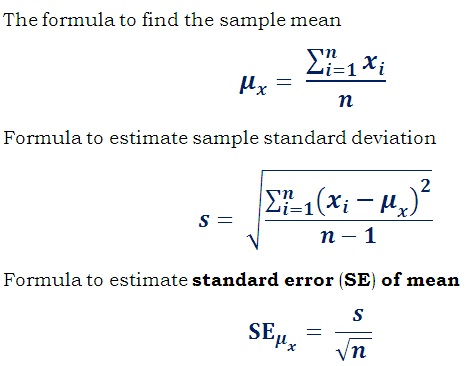
>
> [Image Source](https://ncalculators.com/statistics/standard-error-calculator.htm)


In [89]:
#Your code goes here
#create the function
stdError <- function(x) {
  s <- sqrt(var(x))
  n <- length(x)
  se <- s / sqrt(n)
  return(se)
}

In [90]:
#Your code goes here
#call the function with tapply
stdErrors <- tapply(incomes, statef, stdError)
print(stdErrors)

     act      nsw       nt      qld       sa      tas      vic       wa 
1.500000 4.310195 4.500000 4.106093 2.738613 0.500000 5.244044 2.657536 


## 2 Lists and Dataframes

### 2.1 Lists

> An R list is an object consisting of an ordered collection of objects known as its components.
>
> There is no particular need for the components to be of the same *mode* or *type*, and, for example, a list could consist of a *numeric* vector, a *logical* value, a *matrix*, a *complex* vector, a *character* array, a *function*, and so on.

**Unnamed components**

In [17]:
list1 <- list("Fred", "Mary", 3, c(4,7,9))
print(list1)

[[1]]
[1] "Fred"

[[2]]
[1] "Mary"

[[3]]
[1] 3

[[4]]
[1] 4 7 9



In [18]:
# Indexing
print(list1[1]); print(list1[4])

[[1]]
[1] "Fred"

[[1]]
[1] 4 7 9



**Named Components**

In [19]:
list2 <- list(name="Fred", wife="Mary", no.children=3, child.ages=c(4,7,9))
print(list2)

$name
[1] "Fred"

$wife
[1] "Mary"

$no.children
[1] 3

$child.ages
[1] 4 7 9



In [20]:
print(list2$name); print(list2$child.ages)

[1] "Fred"
[1] 4 7 9


In [21]:
# Indexing
print(list1[1]); print(list1[4])

[[1]]
[1] "Fred"

[[1]]
[1] 4 7 9



### 2.2 Concatenating Lists

In [22]:
list.A <- list(name='John', wife='Mary')
list.B <- list(name='Peter', wife='Jane')
list.C <- list(name='James', wife='Lia')

In [24]:
list.ABC <- c(list.A, list.B, list.C)
print(list.ABC)

$name
[1] "John"

$wife
[1] "Mary"

$name
[1] "Peter"

$wife
[1] "Jane"

$name
[1] "James"

$wife
[1] "Lia"



In [25]:
list.ABC$name; list.ABC$wife

[1] "John"

[1] "Mary"

In [26]:
list.ABC[[1]]; list.ABC[[2]]

[1] "John"

[1] "Mary"

Because R doesn't allow duplicate names for list elements, when you call list.ABC$name, you'll always get the first name entry (i.e., "John").

If you want to retain the structure of the individual lists and access their elements, you'll need to nest them:

In [27]:
list.ABC2 <- list(list.A, list.B, list.C)

In [28]:
print(list.ABC2)

[[1]]
[[1]]$name
[1] "John"

[[1]]$wife
[1] "Mary"


[[2]]
[[2]]$name
[1] "Peter"

[[2]]$wife
[1] "Jane"


[[3]]
[[3]]$name
[1] "James"

[[3]]$wife
[1] "Lia"




In [29]:
list.ABC2[[1]]$name  # Returns "John"
list.ABC2[[1]]$wife  # Returns "Mary"
list.ABC2[[2]]$name  # Returns "Peter"
list.ABC2[[2]]$wife  # Returns "Jane"

[1] "John"

[1] "Mary"

[1] "Peter"

[1] "Jane"

In [30]:
list.ABC2[[1]][[1]]  #Returns "John"

[1] "John"

### 2.3 Data Frames

### What is a Data Frame?
A data frame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). Think of it as a spreadsheet or SQL table, or a dictionary of Series objects in Python's pandas.

### Key Characteristics of Data Frames:
**Columns can be of different types:** For instance, you can have a numeric column, a character column, and a factor all in the same data frame.
**Rows and columns have names:** This makes data manipulation more intuitive, as you can refer to columns and rows by their names.

In [31]:
accountants <- data.frame(home=statef, loot=incomes, shot=incomef)

In [32]:
accountants

home,loot,shot
<fct>,<dbl>,<fct>
tas,60,"(55,65]"
sa,49,"(45,55]"
qld,40,"(35,45]"
nsw,61,"(55,65]"
nsw,64,"(55,65]"
nt,60,"(55,65]"
wa,59,"(55,65]"
wa,54,"(45,55]"
qld,62,"(55,65]"


# Working with Data Frames

## Reading from File

In [33]:
?read.csv

In [37]:
df = read.csv('/content/income.csv')

Ensuring `df` is a data frame object.

In [38]:
is.data.frame(df)

[1] TRUE

## Basic Data Inspection

Use the following functions to inspect the data

**`head`**

In [43]:
head(df,10)

,ID,Income,Age,Education,Gender
,<int>,<int>,<int>,<int>,<int>
1,1,113,69,12,1
2,2,91,52,18,0
3,3,121,65,14,0
4,4,81,58,12,0
5,5,68,31,16,1
6,6,92,51,15,1
7,7,75,53,15,0
8,8,76,56,13,0
9,9,56,42,15,1


**`tail`**

In [44]:
tail(df,10)

,ID,Income,Age,Education,Gender
,<int>,<int>,<int>,<int>,<int>
1491,1491,86,34,16,1
1492,1492,97,39,16,0
1493,1493,62,42,16,1
1494,1494,108,68,16,0
1495,1495,83,59,16,0
1496,1496,84,50,16,0
1497,1497,81,40,16,0
1498,1498,62,30,16,1
1499,1499,99,67,16,0


**`summary`**

In [45]:
summary(df)

       ID             Income            Age          Education    
 Min.   :   1.0   Min.   : 14.00   Min.   :18.00   Min.   :10.00  
 1st Qu.: 375.8   1st Qu.: 62.00   1st Qu.:30.00   1st Qu.:12.00  
 Median : 750.5   Median : 76.00   Median :44.00   Median :15.00  
 Mean   : 750.5   Mean   : 75.99   Mean   :43.58   Mean   :14.68  
 3rd Qu.:1125.2   3rd Qu.: 91.00   3rd Qu.:57.00   3rd Qu.:16.00  
 Max.   :1500.0   Max.   :134.00   Max.   :70.00   Max.   :20.00  
     Gender    
 Min.   :0.00  
 1st Qu.:0.00  
 Median :0.00  
 Mean   :0.49  
 3rd Qu.:1.00  
 Max.   :1.00  

**`class`, `mode`, `typeof`**

In [46]:
# done
class(df)
mode(df)
typeof(df)

[1] "data.frame"

[1] "list"

[1] "list"

**`str`**

In [47]:
str(df) #done

'data.frame':	1500 obs. of  5 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Income   : int  113 91 121 81 68 92 75 76 56 53 ...
 $ Age      : int  69 52 65 58 31 51 53 56 42 33 ...
 $ Education: int  12 18 14 12 16 15 15 13 15 11 ...
 $ Gender   : int  1 0 0 0 1 1 0 0 1 1 ...


**`length`**

In [48]:
length(df)

[1] 5

**`names`**

In [49]:
names(df)

[1] "ID"        "Income"    "Age"       "Education" "Gender"

**`colnames`**

In [50]:
colnames(df)

[1] "ID"        "Income"    "Age"       "Education" "Gender"

**rownames**

> Row names are rare to be used, but they might be present in some datasets. When absent, the row names are set to the equivalent to the indexes.

In [51]:
rownames(df)

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 

## Data Visualization

Using the `plot` function to display scatterplot showing the correlation of all dataframe columns.

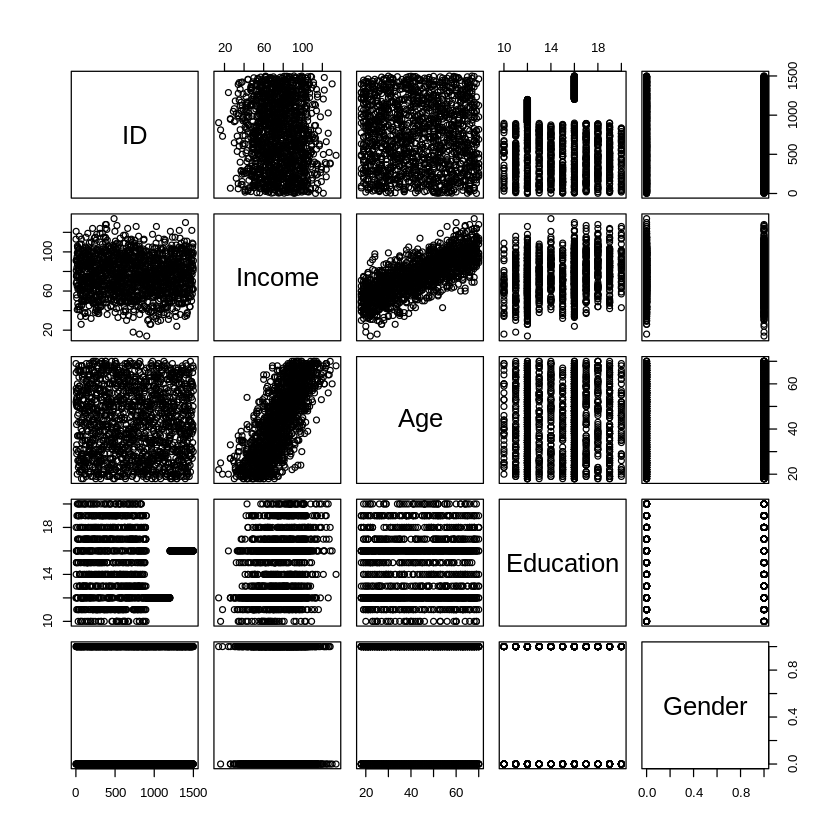

In [52]:
plot(df)

Selecting three pairs of columns. For each pair, displaying a scatterplot to show the correlation between those colums.

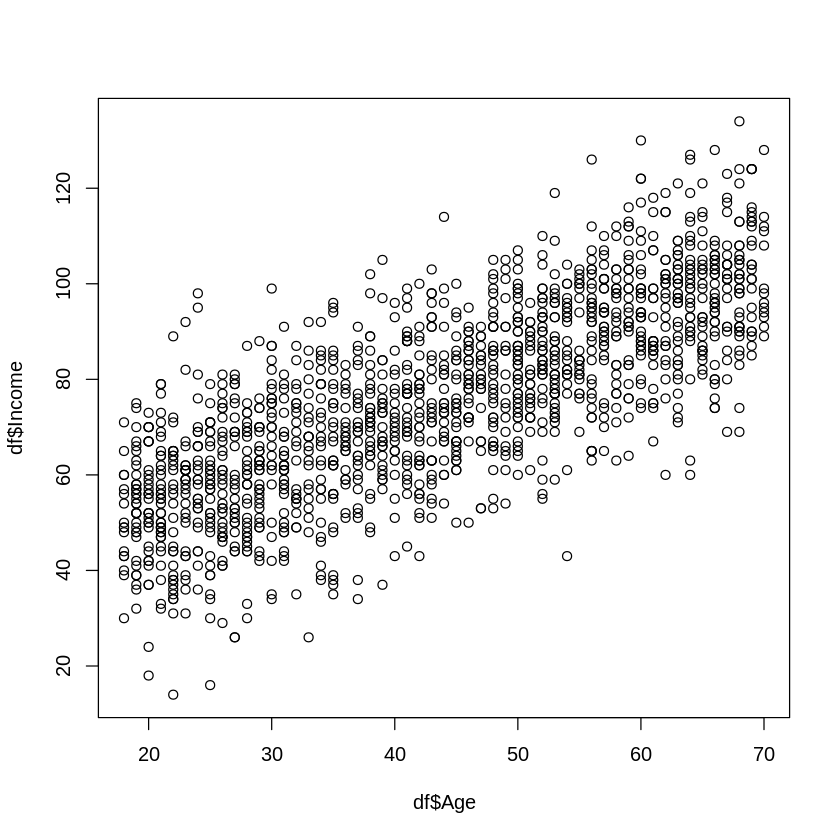

In [53]:
# Plot 1: Age vs Income
plot(df$Age, df$Income)

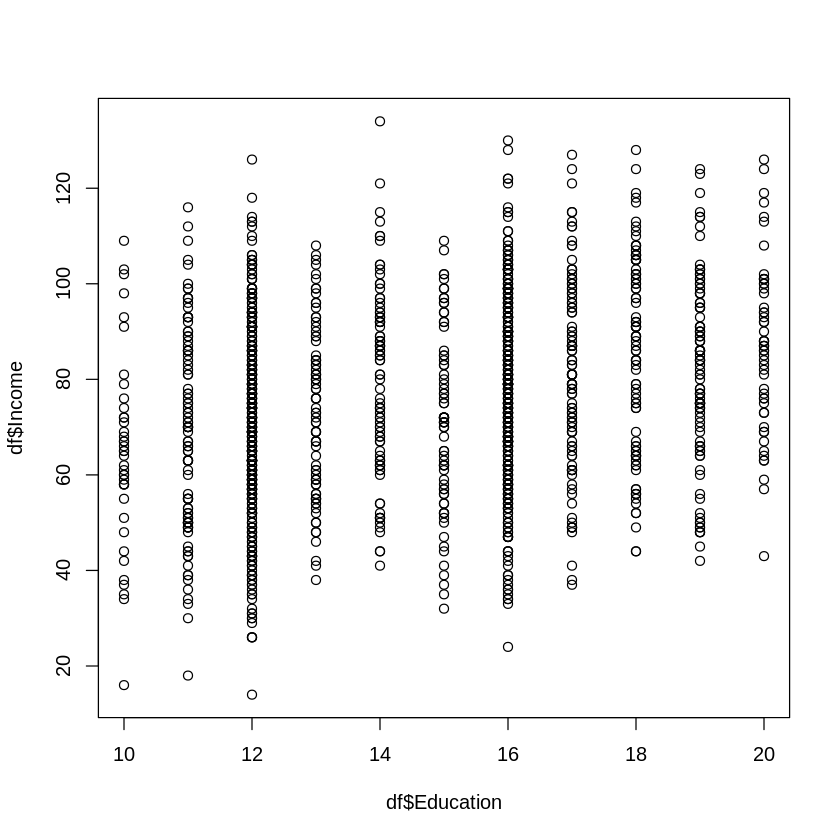

In [54]:
# Plot 2: Education vs Income
plot(df$Education, df$Income)

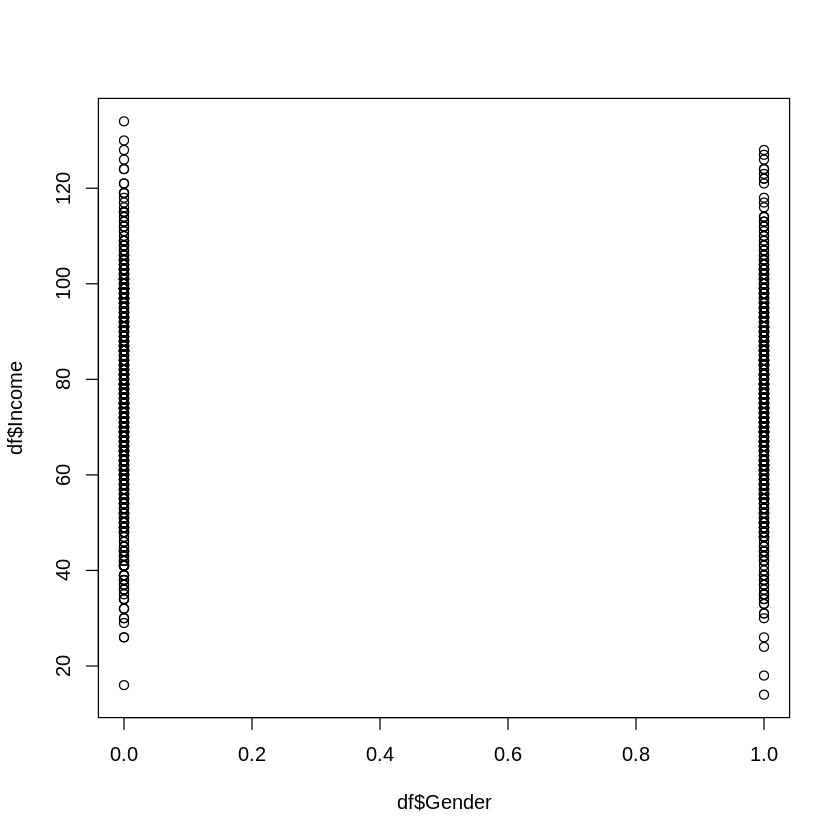

In [55]:
# Plot 3: Gender vs Income
plot(df$Gender, df$Income)

Selecting the Age vs Income plot above to show again below. This time, adding labels using the arguments `main`, `xlab` and `ylab`. Tip, use the help command if needed.

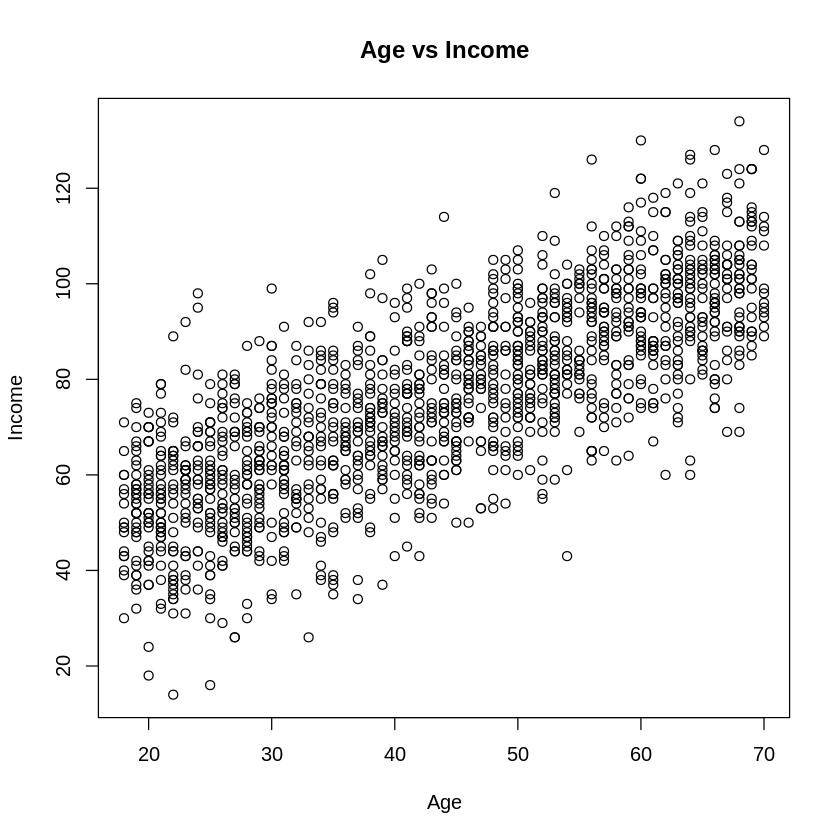

In [56]:
# Plot 1: Age vs Income
plot(df$Age, df$Income, xlab = 'Age', ylab = 'Income', main = 'Age vs Income')

Plotting Gender and Education. Mentally note what you notice in the following plots

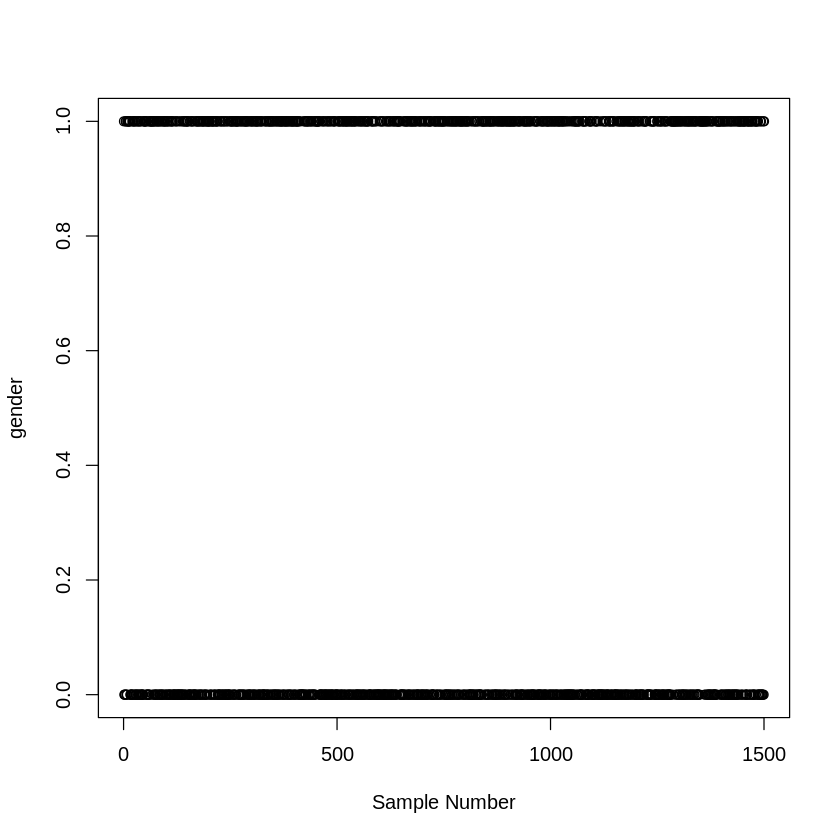

In [57]:
plot(df$Gender, xlab = 'Sample Number', ylab = 'gender')

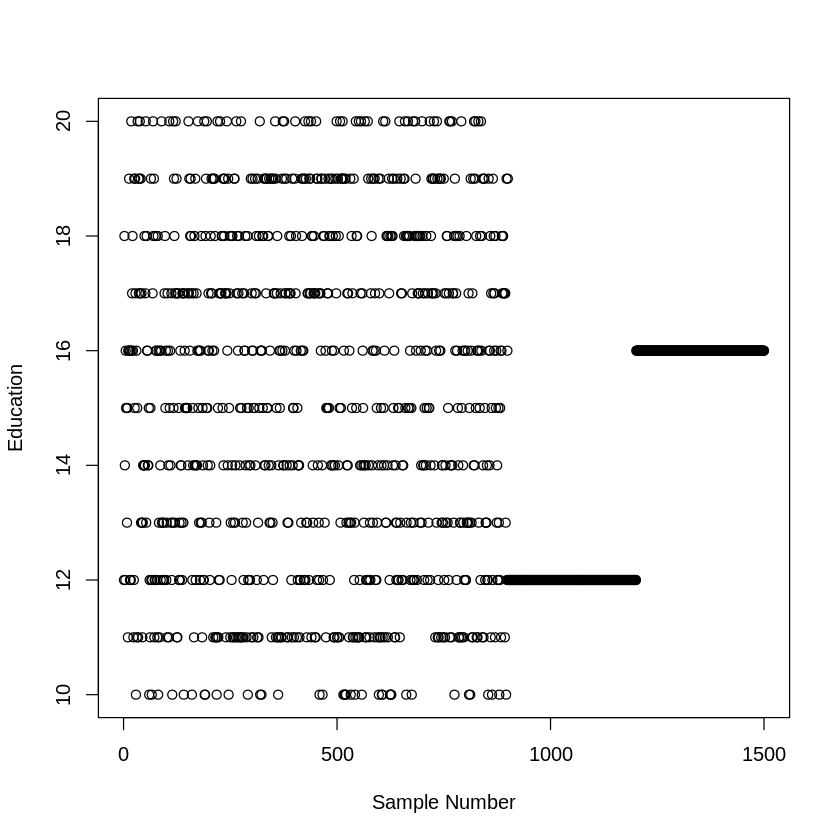

In [58]:
plot(df$Education, xlab = 'Sample Number', ylab = 'Education')

The plots aboves were not much helpful. This is due to the fact that (a) Gender is categorical data; and (b) Education is ordinal data. Now we
1. Use `factor` to adjust the dataframe accordingly.
2. Show how these plots are affected.

In [59]:
df$Gender <- factor(df$Gender)
df$Education <- factor(df$Education)

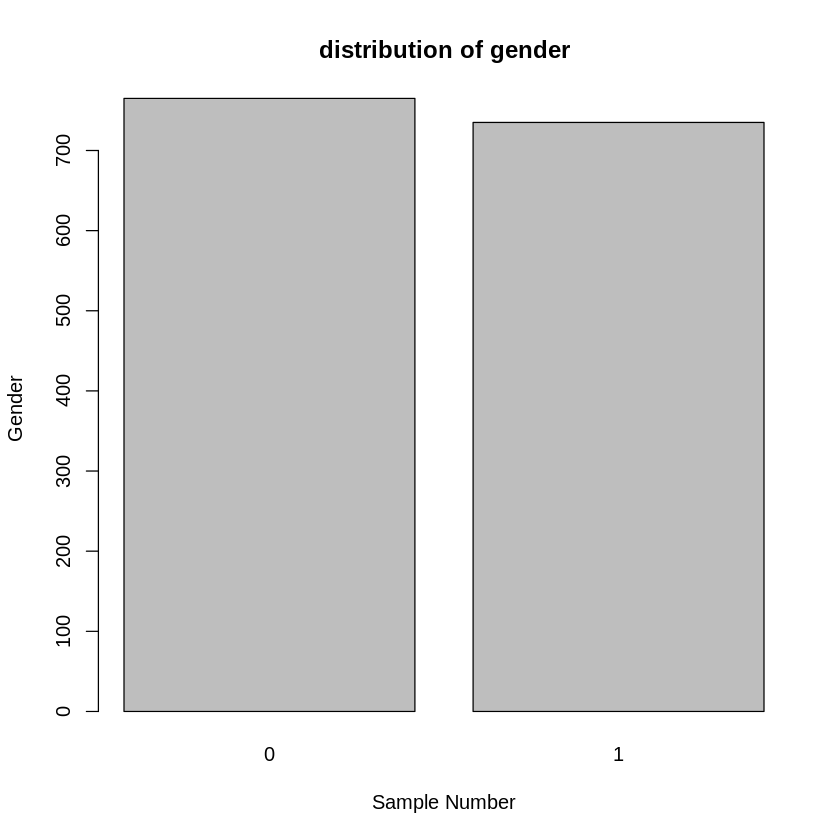

In [60]:
plot(df$Gender, xlab = 'Sample Number', ylab = 'Gender', main = 'distribution of gender')

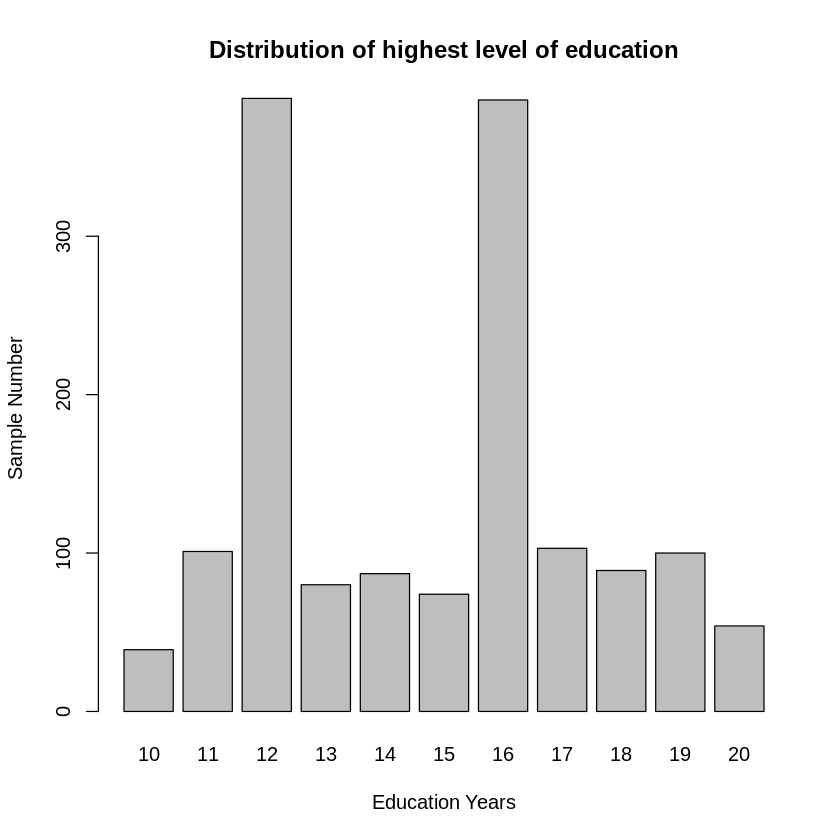

In [61]:

plot(df$Education, xlab = 'Education Years', ylab = 'Sample Number', main = 'Distribution of highest level of education')

Now, we repeat the plots from before, but now notice how the plots change.

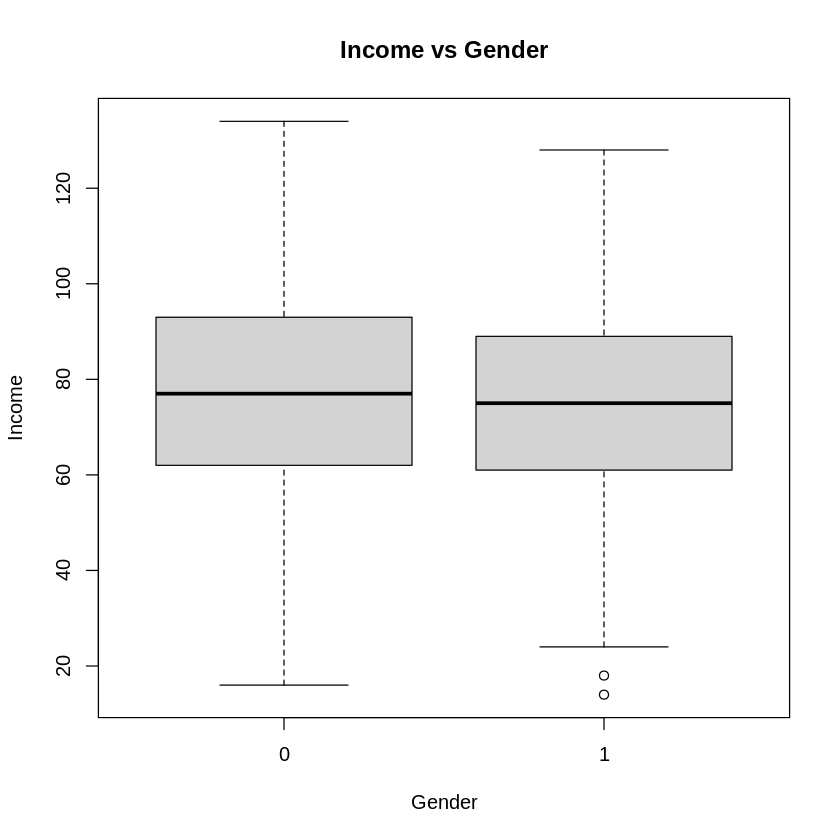

In [69]:
# Plot 2: Gender vs Income

plot(df$Gender, df$Income, xlab = 'Gender', ylab = 'Income', main = 'Income vs Gender')

#boxplot because gender and education are now categorical and since the data is in predefined values, there is no point of having a scatterplot as one axis has predefined values. This is represented better in a boxplot.

# **Task 2:**
Plot Education vs Income and ensure you give proper labels for the x axis, y axis, and title.

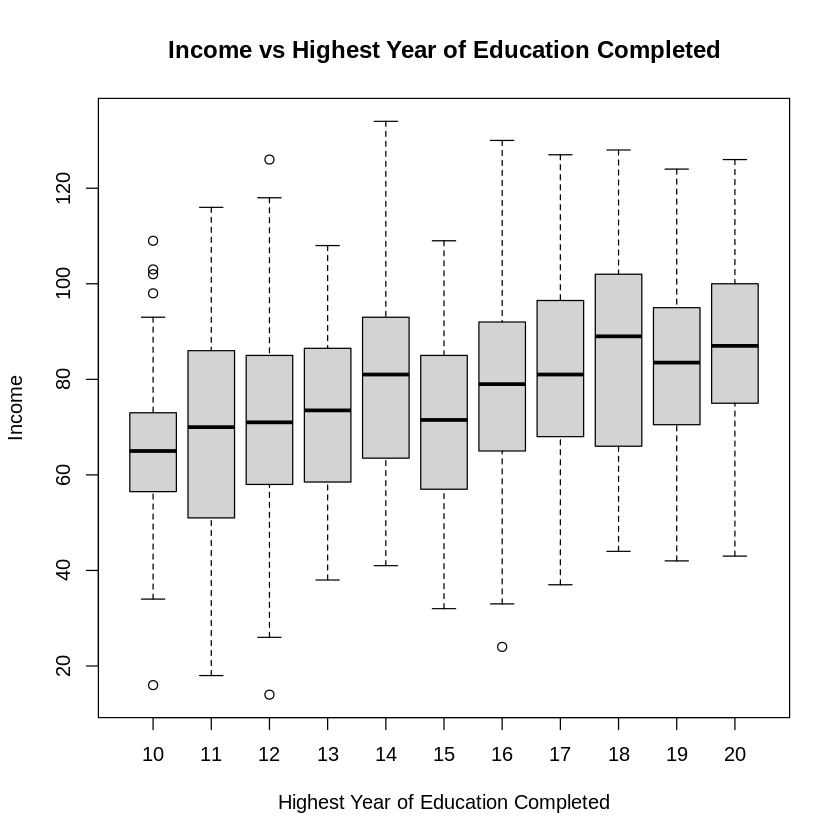

In [92]:
#Your code goes here
plot(df$Education, df$Income, xlab = 'Highest Year of Education Completed', ylab = 'Income', main = 'Income vs Highest Year of Education Completed')


Also notice the change on the reports below.

In [70]:
summary(df) #other section for education and numerical 0,1 for gender

       ID             Income            Age          Education   Gender 
 Min.   :   1.0   Min.   : 14.00   Min.   :18.00   12     :387   0:765  
 1st Qu.: 375.8   1st Qu.: 62.00   1st Qu.:30.00   16     :386   1:735  
 Median : 750.5   Median : 76.00   Median :44.00   17     :103          
 Mean   : 750.5   Mean   : 75.99   Mean   :43.58   11     :101          
 3rd Qu.:1125.2   3rd Qu.: 91.00   3rd Qu.:57.00   19     :100          
 Max.   :1500.0   Max.   :134.00   Max.   :70.00   18     : 89          
                                                   (Other):334          

In [71]:
str(df)

'data.frame':	1500 obs. of  5 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Income   : int  113 91 121 81 68 92 75 76 56 53 ...
 $ Age      : int  69 52 65 58 31 51 53 56 42 33 ...
 $ Education: Factor w/ 11 levels "10","11","12",..: 3 9 5 3 7 6 6 4 6 2 ...
 $ Gender   : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 1 1 2 2 ...


Income and Age are still numeric columns. We can use the hist function to plot a histogram of the numerical columns.

In [72]:
class(df$Income); mode(df$Income); typeof(df$Income)

[1] "integer"

[1] "numeric"

[1] "integer"

In [73]:
class(df$Age); mode(df$Age); typeof(df$Age)

[1] "integer"

[1] "numeric"

[1] "integer"

In [74]:
?hist

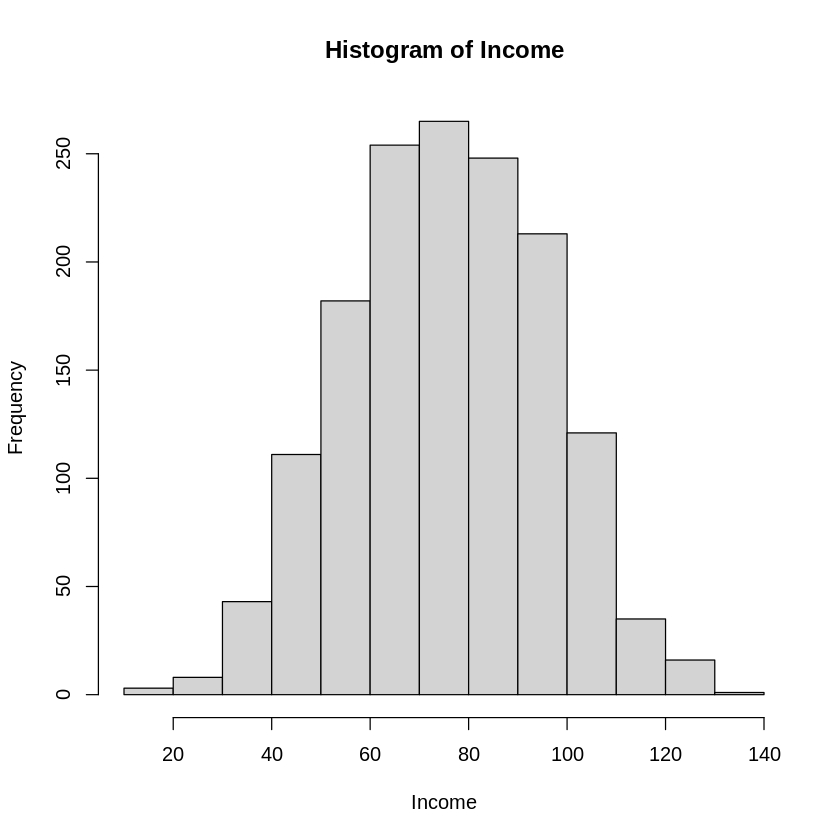

In [75]:
# Histogram of Income
hist(df$Income, xlab = 'Income', main = 'Histogram of Income')

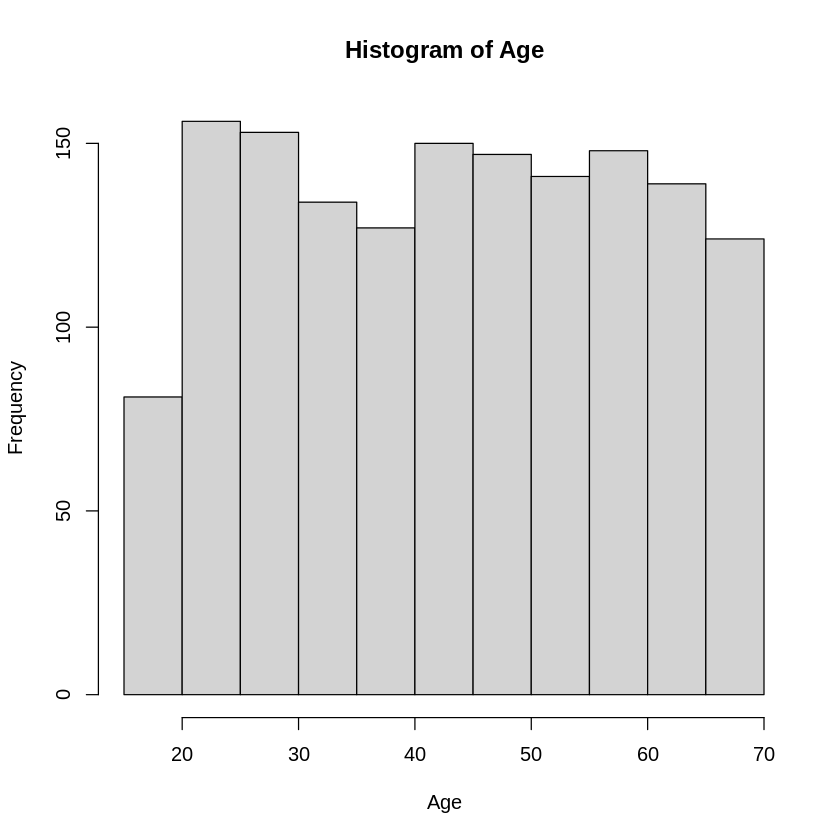

In [76]:
# Plot 2: Histogram of Age
hist(df$Age, xlab = 'Age', main = 'Histogram of Age')

### Complementary Reading

- [10 tips for making your R graphics look their best](https://blog.revolutionanalytics.com/2009/01/10-tips-for-making-your-r-graphics-look-their-best.html)
- [Plot in R](https://r-coder.com/plot-r/)

# Data Extraction

Let's add a new column to the dataframe called `ageGroup`

Creating a vector of (empty) `character`s with the length as the dataframe.

In [77]:
ageGroup<-character(length = nrow(df))
print(length(ageGroup))

[1] 1500


Filling the `ageGroup` vector given following ranges
- `Young`: Ages from until 25
- `Adult`: Ages from 25 until 40
- `Middle Age`: Ages from 40 until 60
- `Senior`: Ages from 60 and above.

In [78]:
ageGroup <- findInterval(df$Age, c(25,40,60))
# sets intervals before 25, between 25 and 40, between 40 and 60 and then above 60

Converting `ageGroup` into a ordered factor.

In [79]:
AgeGroup <- factor(
    ageGroup,
    label = c('Young', 'Adult', 'Middle Age', 'Senior'),
    ordered = TRUE
  );

Adding `AgeGroupd` to the dataframe

In [80]:
df$AgeGroup <- AgeGroup #not "ageGroup" as the factor above changed it to "AgeGroup"

In [81]:
summary(df)

       ID             Income            Age          Education   Gender 
 Min.   :   1.0   Min.   : 14.00   Min.   :18.00   12     :387   0:765  
 1st Qu.: 375.8   1st Qu.: 62.00   1st Qu.:30.00   16     :386   1:735  
 Median : 750.5   Median : 76.00   Median :44.00   17     :103          
 Mean   : 750.5   Mean   : 75.99   Mean   :43.58   11     :101          
 3rd Qu.:1125.2   3rd Qu.: 91.00   3rd Qu.:57.00   19     :100          
 Max.   :1500.0   Max.   :134.00   Max.   :70.00   18     : 89          
                                                   (Other):334          
       AgeGroup  
 Young     :203  
 Adult     :426  
 Middle Age:575  
 Senior    :296  
                 
                 
                 

# Descriptive Analysis

# **Task 3**:
Explore the functions `mean`, `median`, `range`, `sd`, `var`, `IQR`, `cor`, `cov` below. Use the Income column for the data frame for this information. Remember, to index a specific column, you can use '$' followed by the name of that column.

In [93]:
# Your code goes here.
mean_value <- mean(df$Income)
median_value <- median(df$Income)
range_value <- range(df$Income)
sd_value <- sd(df$Income)
var_value <- var(df$Income)
IQR_value <- IQR(df$Income)
cor_value <- cor(df$Income, df$Age)
cov_value <- cov(df$Income, df$Age)
print(list(mean = mean_value, median = median_value, range = range_value, sd = sd_value, var =var_value, IQR = IQR_value, cor = cor_value, cov = cov_value))


$mean
[1] 75.986

$median
[1] 76

$range
[1]  14 134

$sd
[1] 20.00521

$var
[1] 400.2086

$IQR
[1] 29

$cor
[1] 0.7614858

$cov
[1] 231.0869

